<a href="https://colab.research.google.com/github/isaacuribej/Tech4Good_UdeA/blob/main/PipelineTSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalar librerías necesarias


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
#mixmaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Acceder a Google Drive y carga de archivos
Se accede y dan permisos a la cuenta de drive y se accede a los documentos del proyecto segmentados por bioindicadores del dataset MIMIC III

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print("Contenido en la raíz de drive:")
# data_path= f'/content/drive/MyDrive/Piloto Telemedicina - Resguardo Indígena KARMATA RÚA/Ejecución - T4G /SubProyectos_Desarrollo/MIMIC_dataset/Data' ### Ruta ISaac
data_path= f'/content/drive/MyDrive/Proyecto_Health/SubProyectos_Desarrollo/MIMIC_dataset/Data'
#data_path= '/content/drive/MyDrive/Data/'
print(os.listdir(data_path))

Contenido en la raíz de drive:
['CHARTEVENTS.csv.gz', 'PATIENTS.csv.gz', 'D_ITEMS.csv.gz', 'D_LABITEMS.csv.gz', 'LABEVENTS.csv.gz', 'heart_rate.csv.gz', 'blood_pressure_systolic.csv.gz', 'temperature.csv.gz', 'saturacion_oxy.csv.gz', 'glucosa.csv.gz', 'blood_pressure_diastolic.csv.gz', 'chartevents_filtrados.csv']


In [ ]:
ruta_glocosa = data_path + '/glucosa.csv.gz'
ruta_blood_pressure = data_path + '/blood_pressure.csv.gz'
ruta_heart_rate = data_path + '/heart_rate.csv.gz'
ruta_temperature = data_path + '/temperature.csv.gz'
ruta_saturacion_oxy = data_path + '/saturacion_oxy.csv.gz'
ruta_blood_diastolic = data_path + '/blood_pressure_diastolic.csv.gz'
ruta_blood_systolic = data_path + '/blood_pressure_systolic.csv.gz'

In [ ]:
df_heart_rate = pd.read_csv(ruta_heart_rate, compression='gzip')
df_temperature = pd.read_csv(ruta_temperature, compression='gzip')
df_saturacion_oxy = pd.read_csv(ruta_saturacion_oxy, compression='gzip')
df_blood_diastolic = pd.read_csv(ruta_blood_diastolic, compression='gzip')
df_blood_systolic = pd.read_csv(ruta_blood_systolic, compression='gzip')
df_glucosa = pd.read_csv(ruta_glocosa, compression='gzip')

/tmp/ipython-input-6-1831527553.py:6: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_glucosa = pd.read_csv(ruta_glocosa, compression='gzip')


# Visualizacion de Datos y Analisis Graficos para datos

In [ ]:
df_glucosa

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUE,VALUEUOM
0,23,124321,234044.0,220621,2157-10-21 14:40:00,136.0,mg/dL
1,23,124321,234044.0,220621,2157-10-22 03:21:00,114.0,mg/dL
2,36,165660,241249.0,220621,2134-05-12 08:33:00,126.0,mg/dL
3,34,144319,290505.0,220621,2191-02-23 10:48:00,116.0,mg/dL
4,34,144319,290505.0,220621,2191-02-24 04:32:00,103.0,mg/dL
...,...,...,...,...,...,...,...
1257542,32805,124834,252568.0,807,2182-11-22 08:00:00,96,NaN
1257543,32786,165351,275017.0,1529,2152-11-17 03:36:00,165,NaN
1257544,32775,128184,292368.0,807,2200-09-02 02:00:00,118,NaN
1257545,32775,128184,292368.0,811,2200-09-02 02:07:00,108,NaN


In [ ]:
df_glucosa['SUBJECT_ID'].nunique()

37918

In [ ]:
df_filtered = df_glucosa[df_glucosa['SUBJECT_ID'] == 849]
df_filtered

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,VALUE,VALUEUOM
182274,849,137713,236873.0,811,2167-10-02 16:08:00,166,NaN
182275,849,137713,236873.0,807,2167-10-03 15:00:00,333,NaN
182276,849,137713,236873.0,811,2167-10-11 11:00:00,222,NaN
182277,849,137713,236873.0,807,2167-10-19 20:00:00,159,NaN
182278,849,137713,236873.0,807,2167-10-21 11:00:00,63cs,NaN
...,...,...,...,...,...,...,...
186134,849,137713,236873.0,807,2167-09-24 15:00:00,274,NaN
186213,849,137713,236873.0,811,2167-09-26 20:35:00,228,NaN
186249,849,137713,236873.0,811,2167-09-28 01:06:00,165,NaN
186660,849,137713,236873.0,811,2167-09-23 15:00:00,234,NaN


In [ ]:
df_filtered['HADM_ID'].nunique()

3

In [ ]:
# Set para guardar los SUBJECT_ID con outliers
subjects_with_outliers = set()

# Agrupar por SUBJECT_ID
grouped = df_glucosa.groupby('SUBJECT_ID')

# Recorrer cada grupo (paciente)
for subject_id, group in grouped:
    # Convertir a numérico y eliminar valores no numéricos
    values = pd.to_numeric(group['VALUE'], errors='coerce').dropna()

    if len(values) < 5:
        continue

    Q1 = values.quantile(0.25)
    Q3 = values.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = values[(values < lower_bound) | (values > upper_bound)]
    if not outliers.empty:
        subjects_with_outliers.add(subject_id)

# Mostrar resultados
print("Pacientes con outliers encontrados:")
print(sorted(subjects_with_outliers))


Pacientes con outliers encontrados:
[3, 6, 11, 17, 21, 23, 25, 28, 32, 34, 35, 36, 37, 38, 42, 43, 49, 55, 68, 71, 85, 91, 96, 97, 98, 105, 107, 109, 111, 114, 117, 124, 130, 132, 133, 138, 142, 145, 146, 148, 151, 156, 157, 164, 169, 170, 173, 174, 177, 184, 186, 189, 191, 198, 199, 201, 202, 209, 211, 212, 213, 214, 217, 223, 225, 231, 234, 241, 248, 250, 252, 256, 262, 265, 268, 274, 275, 279, 283, 285, 286, 294, 303, 305, 306, 307, 308, 313, 314, 317, 323, 326, 328, 333, 339, 340, 342, 344, 345, 346, 350, 356, 357, 360, 361, 364, 367, 368, 371, 373, 377, 379, 383, 384, 389, 391, 394, 405, 406, 408, 414, 416, 418, 419, 421, 423, 425, 433, 434, 439, 441, 452, 453, 456, 457, 472, 477, 482, 487, 489, 491, 492, 493, 494, 497, 498, 507, 508, 518, 527, 528, 530, 538, 539, 540, 542, 544, 548, 549, 562, 565, 568, 570, 571, 583, 584, 589, 591, 592, 594, 596, 601, 603, 608, 614, 618, 620, 625, 627, 629, 630, 634, 635, 650, 657, 664, 665, 667, 682, 690, 699, 704, 707, 708, 710, 711, 715, 716, 

 anterior trata los valores de cada paciente de forma aislada, pero sigue aplicando la misma regla fija del IQR, que puede ser muy sensible si los datos están concentrados o si hay pocos valores.

In [ ]:
subjects_with_outliers = set()

grouped = df_glucosa.groupby('SUBJECT_ID')

for subject_id, group in grouped:
    values = pd.to_numeric(group['VALUE'], errors='coerce').dropna()

    if len(values) < 5:
        continue

    mean = values.mean()
    std = values.std()

    # Evitar división por cero
    if std == 0:
        continue

    z_scores = (values - mean) / std

    # Outliers si z-score > 3 o < -3
    if (np.abs(z_scores) > 3).any():
        subjects_with_outliers.add(subject_id)

print("Pacientes con outliers (Z-score):")
print(sorted(subjects_with_outliers))


Pacientes con outliers (Z-score):
[6, 21, 25, 36, 38, 68, 109, 111, 117, 124, 130, 132, 145, 148, 156, 157, 164, 169, 174, 184, 186, 191, 198, 199, 209, 211, 213, 223, 234, 248, 250, 252, 265, 283, 285, 286, 305, 306, 308, 323, 328, 339, 340, 342, 344, 345, 346, 357, 360, 361, 364, 368, 377, 391, 405, 406, 408, 416, 419, 421, 423, 433, 434, 439, 441, 457, 472, 477, 489, 492, 497, 507, 508, 518, 528, 530, 540, 549, 571, 592, 618, 634, 665, 667, 682, 704, 710, 711, 715, 720, 741, 745, 747, 751, 766, 770, 773, 776, 781, 784, 787, 798, 801, 818, 820, 822, 824, 827, 834, 849, 856, 864, 865, 878, 883, 897, 899, 907, 914, 915, 924, 925, 929, 930, 938, 957, 959, 961, 975, 1000, 1003, 1004, 1006, 1020, 1036, 1042, 1050, 1062, 1079, 1086, 1092, 1113, 1114, 1135, 1141, 1182, 1193, 1197, 1212, 1222, 1226, 1228, 1232, 1256, 1257, 1260, 1266, 1271, 1289, 1293, 1313, 1332, 1335, 1356, 1367, 1369, 1377, 1380, 1385, 1386, 1394, 1427, 1430, 1436, 1439, 1441, 1453, 1470, 1478, 1488, 1493, 1496, 1501, 152

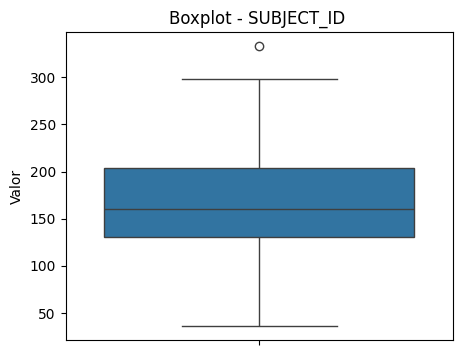

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


group = df_glucosa[df_glucosa['SUBJECT_ID'] == 849]
values = pd.to_numeric(group['VALUE'], errors='coerce').dropna()

plt.figure(figsize=(5, 4))
sns.boxplot(y=values)
plt.title(f'Boxplot - SUBJECT_ID ')
plt.ylabel('Valor')
plt.show()

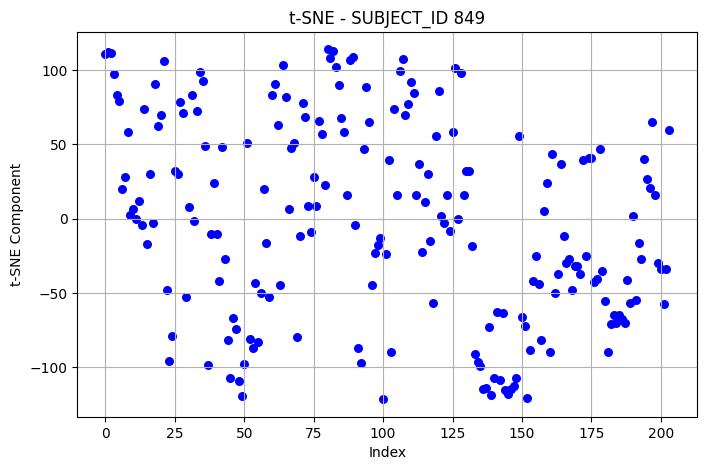

In [ ]:
subject_id = 849  # Reemplaza con el ID del sujeto que deseas visualizar

# Filtrar los datos del sujeto
df_subject = df_glucosa[df_glucosa['SUBJECT_ID'] == subject_id].copy()

# Convertir 'VALUE' a numérico y eliminar NaNs
df_subject['VALUE'] = pd.to_numeric(df_subject['VALUE'], errors='coerce')
df_subject = df_subject.dropna(subset=['VALUE'])

# Ordenar por tiempo si es posible
df_subject = df_subject.sort_values('CHARTTIME')

# Escalar (normalizar)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_subject[['VALUE']])
# Aplicar t-SNE con n_components=1 ya que solo tenemos una feature
# Ajustar perplexity para que sea menor que el número de muestras (19 en este caso)
tsne = TSNE(n_components=1, perplexity=5, random_state=42)  # Perplexity cambiada a 5
X_tsne = tsne.fit_transform(X_scaled)

# ... (rest of the code)
# Graficar
plt.figure(figsize=(8, 5))
plt.scatter(range(len(X_tsne)), X_tsne[:, 0], c='blue', s=30)
plt.title(f't-SNE - SUBJECT_ID {subject_id}')
plt.xlabel('Index')
plt.ylabel('t-SNE Component')
plt.grid(True)
plt.show()

# Preprocesado y montaje de datos por paciente
Primero: crear función para preparar cada DataFrame

In [ ]:
# Primero: crear función para preparar cada DataFrame
def preparar_signo(df, nombre_signo):
    # Verificar si las columnas ya han sido renombradas
    value_col = 'VALUE' if 'VALUE' in df.columns else f'{nombre_signo}_VALUE'
    valueuom_col = 'VALUEUOM' if 'VALUEUOM' in df.columns else f'{nombre_signo}_UOM'

    df = df[['SUBJECT_ID', 'HADM_ID', 'CHARTTIME', value_col, valueuom_col]].copy()
    df = df.rename(columns={
        value_col: f'{nombre_signo}_VALUE',
        valueuom_col: f'{nombre_signo}_UOM'
    })
    return df

# Preparar cada uno
df_hr = preparar_signo(df_heart_rate, 'HEART_RATE')
df_temp = preparar_signo(df_temperature, 'TEMPERATURE')
df_oxy = preparar_signo(df_saturacion_oxy, 'OXYGEN_SAT')
df_dia = preparar_signo(df_blood_diastolic, 'BLOOD_DIASTOLIC')
df_sys = preparar_signo(df_blood_systolic, 'BLOOD_SYSTOLIC')
df_glucosa = preparar_signo(df_glucosa, 'GLUCOSE')  # Asegúrate que este DataFrame exista

from functools import reduce

dfs = [df_hr, df_temp, df_oxy, df_dia, df_sys, df_glucosa]

df_merged = reduce(lambda left, right: pd.merge(
    left, right,
    on=['SUBJECT_ID', 'HADM_ID', 'CHARTTIME'], #Agregar o
    how='outer'
), dfs)

# Ordenar por paciente y admisión
df_merged = df_merged.sort_values(by=['SUBJECT_ID', 'HADM_ID', 'CHARTTIME']).reset_index(drop=True)

# Mostrar resultado
df_merged.head()


,SUBJECT_ID,HADM_ID,CHARTTIME,HEART_RATE_VALUE,HEART_RATE_UOM,TEMPERATURE_VALUE,TEMPERATURE_UOM,OXYGEN_SAT_VALUE,OXYGEN_SAT_UOM,BLOOD_DIASTOLIC_VALUE,BLOOD_DIASTOLIC_UOM,BLOOD_SYSTOLIC_VALUE,BLOOD_SYSTOLIC_UOM,GLUCOSE_VALUE,GLUCOSE_UOM
0,2,163353,2138-07-17 20:20:00,148.0,bpm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,163353,2138-07-17 20:30:00,131.0,bpm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,163353,2138-07-17 21:00:00,144.0,bpm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,163353,2138-07-17 22:00:00,140.0,bpm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,145834,2101-10-20 18:45:00,95.0,BPM,NaN,NaN,98.0,%,NaN,NaN,NaN,NaN,NaN,NaN


========================================================================
PARTE DE PRUEBAS

In [ ]:
import pandas as pd

# Valores normales por defecto para cada signo vital
valores_normales = {
    'HEART_RATE_VALUE': 80,
    'TEMPERATURE_VALUE': 36.8,
    'OXYGEN_SAT_VALUE': 98,
    'BLOOD_DIASTOLIC_VALUE': 70,
    'BLOOD_SYSTOLIC_VALUE': 120,
    'GLUCOSE_VALUE': 100
}

# Función para preparar cada signo vital
def preparar_signo(df, nombre_signo):
    value_col = 'VALUE' if 'VALUE' in df.columns else f'{nombre_signo}_VALUE'
    valueuom_col = 'VALUEUOM' if 'VALUEUOM' in df.columns else f'{nombre_signo}_UOM'

    df = df[['SUBJECT_ID', 'HADM_ID', value_col]].copy()
    df = df.rename(columns={value_col: f'{nombre_signo}_VALUE'})

    # Convertir la columna de valor a numérico, convirtiendo errores a NaN y luego eliminando NaNs
    df[f'{nombre_signo}_VALUE'] = pd.to_numeric(df[f'{nombre_signo}_VALUE'], errors='coerce')
    df = df.dropna(subset=[f'{nombre_signo}_VALUE'])

    return df

# Aplicar función a cada DataFrame
df_hr = preparar_signo(df_heart_rate, 'HEART_RATE')
df_temp = preparar_signo(df_temperature, 'TEMPERATURE')
df_oxy = preparar_signo(df_saturacion_oxy, 'OXYGEN_SAT')
df_dia = preparar_signo(df_blood_diastolic, 'BLOOD_DIASTOLIC')
df_sys = preparar_signo(df_blood_systolic, 'BLOOD_SYSTOLIC')
df_glucosa = preparar_signo(df_glucosa, 'GLUCOSE')

# Agrupar y promediar por SUBJECT_ID y HADM_ID
from functools import reduce

dfs_grouped = [
    df_hr.groupby(['SUBJECT_ID', 'HADM_ID']).mean().reset_index(),
    df_temp.groupby(['SUBJECT_ID', 'HADM_ID']).mean().reset_index(),
    df_oxy.groupby(['SUBJECT_ID', 'HADM_ID']).mean().reset_index(),
    df_dia.groupby(['SUBJECT_ID', 'HADM_ID']).mean().reset_index(),
    df_sys.groupby(['SUBJECT_ID', 'HADM_ID']).mean().reset_index(),
    df_glucosa.groupby(['SUBJECT_ID', 'HADM_ID']).mean().reset_index()
]

# Unir todos los DataFrames agrupados
df_unificado = reduce(lambda left, right: pd.merge(
    left, right, on=['SUBJECT_ID', 'HADM_ID'], how='outer'
), dfs_grouped)

# Rellenar NaNs con los valores normales definidos
df_unificado.fillna(valores_normales, inplace=True)

# Mostrar resultado final
df_unificado

,SUBJECT_ID,HADM_ID,HEART_RATE_VALUE,TEMPERATURE_VALUE,OXYGEN_SAT_VALUE,BLOOD_DIASTOLIC_VALUE,BLOOD_SYSTOLIC_VALUE,GLUCOSE_VALUE
0,2,163353,140.750000,36.800000,98.000000,70.000000,120.000000,100.000000
1,3,145834,92.376471,36.951042,97.133333,60.648649,117.792793,152.096774
2,4,185777,90.354839,36.800000,97.233333,70.000000,120.000000,206.181818
3,5,178980,140.000000,36.800000,98.000000,70.000000,120.000000,100.000000
4,6,107064,86.549451,36.800000,97.764045,59.815789,153.605263,118.789474
...,...,...,...,...,...,...,...,...
56636,99985,176670,91.985185,36.800000,97.387097,59.022523,119.418919,125.461538
56637,99991,151118,97.580952,36.800000,96.718447,82.675676,168.891892,139.400000
56638,99992,197084,72.622222,36.800000,92.422222,70.000000,120.000000,116.500000
56639,99995,137810,73.474576,36.800000,97.709091,50.307692,132.423077,123.750000


# PRUEBA CON 100 MUESTRAS SIN

In [ ]:
import pandas as pd

# Función para preparar y convertir CHARTTIME a fecha
def preparar_signo(df, nombre_signo):
    value_col = 'VALUE' if 'VALUE' in df.columns else f'{nombre_signo}_VALUE'
    valueuom_col = 'VALUEUOM' if 'VALUEUOM' in df.columns else f'{nombre_signo}_UOM'

    df = df[['SUBJECT_ID', 'HADM_ID',  value_col, valueuom_col]].copy()
    #df['CHARTTIME'] = pd.to_datetime(df['CHARTTIME']).dt.date  # Solo la fecha (sin hora)
    df = df.rename(columns={
        value_col: f'{nombre_signo}_VALUE',
        valueuom_col: f'{nombre_signo}_UOM'
    })
    return df

# Preparar los dataframes individuales
df_hr = preparar_signo(df_heart_rate, 'HEART_RATE')
df_temp = preparar_signo(df_temperature, 'TEMPERATURE')
df_oxy = preparar_signo(df_saturacion_oxy, 'OXYGEN_SAT')
df_dia = preparar_signo(df_blood_diastolic, 'BLOOD_DIASTOLIC')
df_sys = preparar_signo(df_blood_systolic, 'BLOOD_SYSTOLIC')
df_glucosa = preparar_signo(df_glucosa, 'GLUCOSE')

# Merge incremental
from functools import reduce
dfs = [df_hr, df_temp, df_oxy, df_dia, df_sys, df_glucosa]

df_merged = dfs[0]
for df_next in dfs[1:]:
    df_merged = pd.merge(
        df_merged, df_next,
        on=['SUBJECT_ID', 'HADM_ID'],
        how='outer'
    )

    # Liberar memoria
    import gc
    gc.collect()

# Ordenar y limitar a 100 muestras
df_merged = df_merged.sort_values(by=['SUBJECT_ID', 'HADM_ID', 'CHARTTIME']).reset_index(drop=True)
df_merged = df_merged.head(100)  # Limitar a 100 registros

# Mostrar resultado
df_merged.head()


KeyError: "['GLUCOSE_UOM'] not in index"


####FLUJO NORMAL DE DATOS


In [ ]:
df_merged

In [ ]:
df_filtered2 = df_unificado[df_merged['SUBJECT_ID'] ==84]
df_filtered2

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # Import numpy for np.nan_to_num

# ← Reemplaza con un SUBJECT_ID real del DataFrame
subject_id = 849

# Filtrar todos los datos del paciente
df_paciente = df_merged[df_merged['SUBJECT_ID'] == subject_id].copy()

# Seleccionar solo columnas numéricas de signos vitales
columns_vitales = [col for col in df_paciente.columns if col.endswith('_VALUE')]
X = df_paciente[columns_vitales]

# Convertir las columnas a numéricas, los errores no numéricos se convierten a NaN
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Rellenar NaNs (puedes elegir interpolación, forward-fill, o 0)
X = X.fillna(method='ffill').fillna(method='bfill')

# Reemplazar cualquier NaN infinito restante con 0 después de ffill y bfill
X = X.fillna(0)

# Estandarizar
scaler = StandardScaler()
# Reemplazar cualquier NaN o infinito en X_scaled con 0
X_scaled = np.nan_to_num(scaler.fit_transform(X))

# Aplicar t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Graficar
plt.figure(figsize=(8, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='navy', s=40)
plt.title(f't-SNE para SUBJECT_ID {subject_id}')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # Import numpy for np.nan_to_num

# ← Reemplaza con un SUBJECT_ID real del DataFrame
subject_id = 93

# Filtrar todos los datos del paciente
df_paciente = df_unificado[df_unificado['SUBJECT_ID'] == subject_id].copy()

# Añadir una verificación para ver si el DataFrame del paciente está vacío
if df_paciente.empty:
    print(f"No se encontraron datos para SUBJECT_ID {subject_id} en df_unificado. Saltando el procesamiento.")
else:
    # Seleccionar solo columnas numéricas de signos vitales
    columns_vitales = [col for col in df_paciente.columns if col.endswith('_VALUE')]
    X = df_paciente[columns_vitales]

    # Convertir las columnas a numéricas, los errores no numéricos se convierten a NaN
    for col in X.columns:
        X[col] = pd.to_numeric(X[col], errors='coerce')

    # Rellenar NaNs (puedes elegir interpolación, forward-fill, o 0)
    X = X.fillna(method='ffill').fillna(method='bfill')

    # Reemplazar cualquier NaN infinito restante con 0 después de ffill y bfill
    X = X.fillna(0)

    # Estandarizar
    scaler = StandardScaler()
    # Reemplazar cualquier NaN o infinito en X_scaled con 0
    X_scaled = np.nan_to_num(scaler.fit_transform(X))

    # Aplicar t-SNE
    # Ajustar perplexity para que sea menor que el número de muestras
    n_samples = X_scaled.shape[0]
    # perplexity must be < n_samples
    # If n_samples is small (like 3 in this case), perplexity should be set to 2
    # Ensure perplexity is at least 2 if n_samples >= 2, otherwise handle
    perplexity_val = min(5, n_samples - 1) if n_samples > 1 else 1 # Adjusted perplexity calculation
    if perplexity_val < 1: # Ensure perplexity is at least 1 if n_samples is 1
         perplexity_val = 1

    # TSNE requires at least 2 samples to calculate pairwise distances
    if n_samples < 2:
        print(f"No hay suficientes muestras ({n_samples}) para SUBJECT_ID {subject_id} para aplicar t-SNE. Se requieren al menos 2 muestras.")
    else:
        tsne = TSNE(n_components=2, perplexity=perplexity_val, random_state=42)
        X_tsne = tsne.fit_transform(X_scaled)

        # Graficar
        plt.figure(figsize=(8, 5))
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='navy', s=40)
        plt.title(f't-SNE para SUBJECT_ID {subject_id}')
        plt.xlabel('Componente 1')
        plt.ylabel('Componente 2')
        plt.grid(True)
        plt.show()

#OTRO ENFOQUE: 🔍 Transformación de Signos Vitales: Formato Ancho por Paciente e Ingreso
En esta sección filtramos los registros correspondientes a signos vitales desde df_chartevents_filtrado, conservando únicamente los datos necesarios (SUBJECT_ID, HADM_ID, CHARTTIME, VALUENUM). Luego, mapeamos cada ITEMID a su nombre clínico y transformamos el dataset de formato largo a ancho, creando columnas separadas para cada signo vital, listas para análisis o visualización.

In [ ]:
import pandas as pd

# Lista de pacientes que quieres extraer (puedes poner SUBJECT_ID reales aquí)
pacientes_objetivo = set([3, 6, 11, 17, 21, 23, 25, 28, 32, 34, 35, 36, 37, 38, 42, 43, 49, 55, 68, 71, 85, 91, 96, 97, 98, 105, 107, 109, 111])  # <- Ejemplo

# Ruta al archivo grande
# data_path= f'/content/drive/MyDrive/Piloto Telemedicina - Resguardo Indígena KARMATA RÚA/Ejecución - T4G /SubProyectos_Desarrollo/MIMIC_dataset/Data' # Ruta Isaac

data_path= f'/content/drive/MyDrive/Proyecto_Health/SubProyectos_Desarrollo/MIMIC_dataset/Data' # Ruta Cristian
rutachartevents = data_path + "/CHARTEVENTS.csv.gz"  # Cambia esta ruta si es necesario

# Lista para almacenar los fragmentos
chunks_filtrados = []

# Leer por chunks y filtrar solo los pacientes deseados
for chunk in pd.read_csv(rutachartevents, compression='gzip', chunksize=100000):  # puedes ajustar el tamaño
    filtrado = chunk[chunk['SUBJECT_ID'].isin(pacientes_objetivo)]
    if not filtrado.empty:
        chunks_filtrados.append(filtrado)

# Unir todos los fragmentos
df_chartevents_filtrado = pd.concat(chunks_filtrados, ignore_index=True)

# Mostrar una muestra
print(df_chartevents_filtrado.head())

In [ ]:
df_chartevents_filtrado

In [ ]:
# Guarda el DataFrame con pacientes seleccionados
df_chartevents_filtrado.to_csv('/content/chartevents_filtrados.csv', index=False)

# Secuencia
- Apartir de esta casilla puedes cargar el archivo "chartevents_filtrados.csv" para correr la siguiente casilla
- La parte anterior es para segmentar el archivo completo de CHARTEVENTS en pacientes en especifico recorriendo el archivo por chuncks
- Si ya corrite la parte anterior no es necesario que lo vuelvas hacer, simplemente sigue apartir de este apartado

In [2]:
df_chartevents_filtrado = pd.read_csv('/content/chartevents_filtrados.csv')

/tmp/ipython-input-2-1385562213.py:1: DtypeWarning: Columns (10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_chartevents_filtrado = pd.read_csv('/content/chartevents_filtrados.csv')


In [3]:
itemid_to_signo = {
    211: 'HEART_RATE', 220045: 'HEART_RATE',
    51: 'SYSTOLIC_BP', 455: 'SYSTOLIC_BP',
    8368: 'DIASTOLIC_BP', 8440: 'DIASTOLIC_BP',
    52: 'MEAN_BP', 456: 'MEAN_BP',
    618: 'RESP_RATE', 220210: 'RESP_RATE',
    223761: 'TEMP', 678: 'TEMP',
    646: 'OXYGEN_SAT', 220277: 'OXYGEN_SAT',
    807: 'GLUCOSE', 220621: 'GLUCOSE',
}

In [4]:
# Filtrar solo los registros de signos vitales deseados
df_vitales = df_chartevents_filtrado[df_chartevents_filtrado['ITEMID'].isin(itemid_to_signo.keys())].copy()

# Agregar nombre de signo vital
df_vitales['SIGNO'] = df_vitales['ITEMID'].map(itemid_to_signo)

# Nos quedamos solo con las columnas necesarias
df_vitales = df_vitales[['SUBJECT_ID', 'HADM_ID', 'CHARTTIME', 'SIGNO', 'VALUENUM']]

In [5]:
# Pivotear el DataFrame
df_signos_wide = df_vitales.pivot_table(
    index=['SUBJECT_ID', 'HADM_ID', 'CHARTTIME'],
    columns='SIGNO',
    values='VALUENUM',
    aggfunc='first'  # Mantener el primer valor si hay duplicados
).reset_index()

In [6]:
df_signos_wide

SIGNO,SUBJECT_ID,HADM_ID,CHARTTIME,DIASTOLIC_BP,GLUCOSE,HEART_RATE,MEAN_BP,OXYGEN_SAT,RESP_RATE,SYSTOLIC_BP,TEMP
0,3,145834,2101-10-20 18:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.900002
1,3,145834,2101-10-20 18:45:00,NaN,NaN,95.0,36.666698,98.0,16.0,62.0,NaN
2,3,145834,2101-10-20 19:00:00,NaN,NaN,NaN,47.333302,82.0,NaN,66.0,NaN
3,3,145834,2101-10-20 19:15:00,0.0,NaN,NaN,259.000000,74.0,NaN,0.0,NaN
4,3,145834,2101-10-20 19:30:00,NaN,NaN,151.0,76.666702,NaN,NaN,102.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7155,111,192123,2142-05-04 15:00:00,NaN,NaN,65.0,83.000000,95.0,NaN,144.0,NaN
7156,111,192123,2142-05-04 16:00:00,NaN,NaN,63.0,93.000000,92.0,25.0,166.0,98.400002
7157,111,192123,2142-05-04 17:00:00,NaN,138.0,60.0,85.000000,95.0,22.0,153.0,NaN
7158,111,192123,2142-05-04 18:00:00,NaN,NaN,68.0,85.000000,93.0,23.0,160.0,NaN


In [7]:
df_signos_wide['SUBJECT_ID'].unique()

array([  3,   6,  11,  17,  21,  23,  25,  28,  32,  34,  35,  36,  37,
        38,  42,  43,  49,  55,  68,  71,  85,  91,  96,  97,  98, 105,
       107, 109, 111])

In [8]:
# Asegurar que CHARTTIME esté en formato datetime
df_signos_wide['CHARTTIME'] = pd.to_datetime(df_signos_wide['CHARTTIME'])

# Redondear CHARTTIME a la hora (para evitar diferencias por minutos)
df_signos_wide['CHARTTIME'] = df_signos_wide['CHARTTIME'].dt.floor('H')

# Ordenar por paciente, ingreso y tiempo
df_signos_wide = df_signos_wide.sort_values(by=['SUBJECT_ID', 'HADM_ID', 'CHARTTIME'])

# Agrupar y rellenar hacia adelante y atrás para evitar NaN dentro de misma hora
df_signos_filled = df_signos_wide.groupby(['SUBJECT_ID', 'HADM_ID', 'CHARTTIME']).first().reset_index()
df_signos_filled = df_signos_filled.groupby(['SUBJECT_ID', 'HADM_ID']).apply(lambda group: group.ffill().bfill()).reset_index(drop=True)
df_signos_filled

/tmp/ipython-input-8-2247768024.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_signos_wide['CHARTTIME'] = df_signos_wide['CHARTTIME'].dt.floor('H')
/tmp/ipython-input-8-2247768024.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_signos_filled = df_signos_filled.groupby(['SUBJECT_ID', 'HADM_ID']).apply(lambda group: group.ffill().bfill()).reset_index(drop=True)


SIGNO,SUBJECT_ID,HADM_ID,CHARTTIME,DIASTOLIC_BP,GLUCOSE,HEART_RATE,MEAN_BP,OXYGEN_SAT,RESP_RATE,SYSTOLIC_BP,TEMP
0,3,145834,2101-10-20 18:00:00,0.0,306.0,95.0,36.666698,98.0,16.0,62.0,96.900002
1,3,145834,2101-10-20 19:00:00,0.0,306.0,151.0,47.333302,82.0,16.0,66.0,96.900002
2,3,145834,2101-10-20 20:00:00,49.0,306.0,143.0,60.000000,82.0,5.0,78.0,96.900002
3,3,145834,2101-10-20 21:00:00,43.0,306.0,135.0,55.000000,99.0,15.0,73.0,96.900002
4,3,145834,2101-10-20 22:00:00,66.0,306.0,128.0,88.000000,100.0,21.0,123.0,96.900002
...,...,...,...,...,...,...,...,...,...,...,...
5700,111,192123,2142-05-04 15:00:00,63.0,147.0,65.0,83.000000,95.0,27.0,144.0,98.000000
5701,111,192123,2142-05-04 16:00:00,63.0,147.0,63.0,93.000000,92.0,25.0,166.0,98.400002
5702,111,192123,2142-05-04 17:00:00,63.0,138.0,60.0,85.000000,95.0,22.0,153.0,98.400002
5703,111,192123,2142-05-04 18:00:00,63.0,138.0,68.0,85.000000,93.0,23.0,160.0,98.400002


/tmp/ipython-input-9-1439828763.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_filled = X.fillna(method='ffill').fillna(method='bfill')  # completar datos que falten


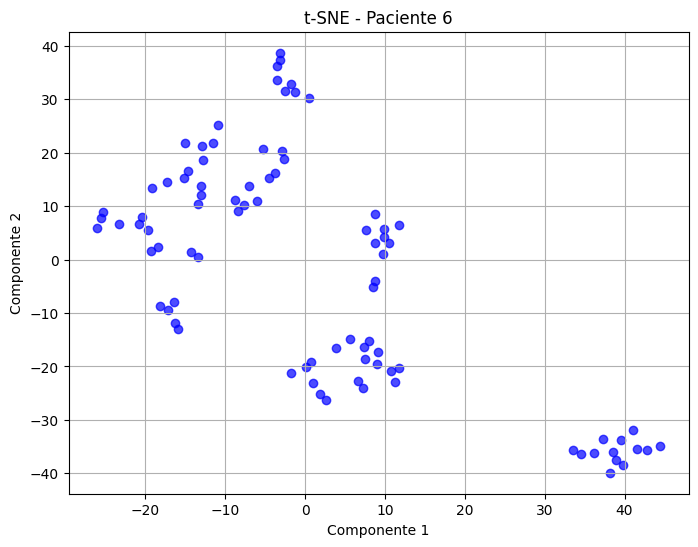

In [9]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Filtrar paciente 3
df_paciente3 = df_signos_filled[df_signos_filled['SUBJECT_ID'] == 6].copy()

# 2. Eliminar columnas no numéricas
X = df_paciente3.drop(columns=['SUBJECT_ID', 'HADM_ID', 'CHARTTIME'])

# 3. Eliminar filas completamente vacías y luego normalizar
X = X.dropna(how='all')
X_filled = X.fillna(method='ffill').fillna(method='bfill')  # completar datos que falten
X_scaled = StandardScaler().fit_transform(X_filled)

# 4. Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
X_tsne = tsne.fit_transform(X_scaled)

# 5. Graficar
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='blue', alpha=0.7)
plt.title('t-SNE - Paciente 6' ) # Updated title
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.show()

En esta sección, aplicamos la técnica de reducción de dimensionalidad t-SNE (t-distributed Stochastic Neighbor Embedding) para visualizar patrones en los signos vitales del paciente con SUBJECT_ID = 3. Este método nos permite proyectar datos clínicos multivariados a un espacio bidimensional, facilitando la detección de agrupamientos o posibles valores atípicos (outliers).

Antes de aplicar t-SNE:

- Filtramos los registros correspondientes únicamente al paciente 3.

- Eliminamos columnas no numéricas y completamos los valores faltantes usando interpolaciones simples (ffill y bfill).

- Normalizamos los datos para garantizar que todas las variables tengan un peso comparable.

- Finalmente, se aplicó t-SNE y se generó una visualización 2D, en la que cada punto representa una medición horaria del estado clínico del paciente.



/tmp/ipython-input-10-3005368256.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_filled = X.fillna(method='ffill').fillna(method='bfill')  # completar internamente


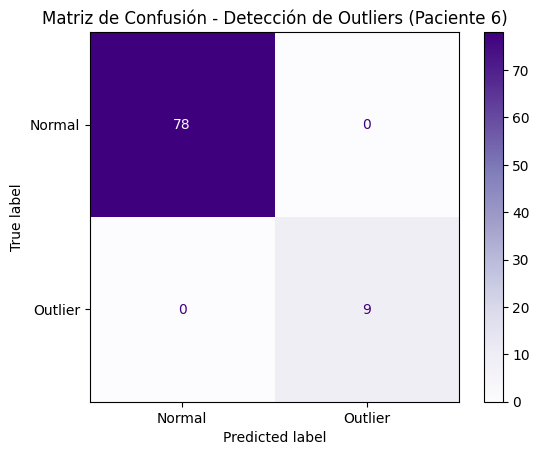

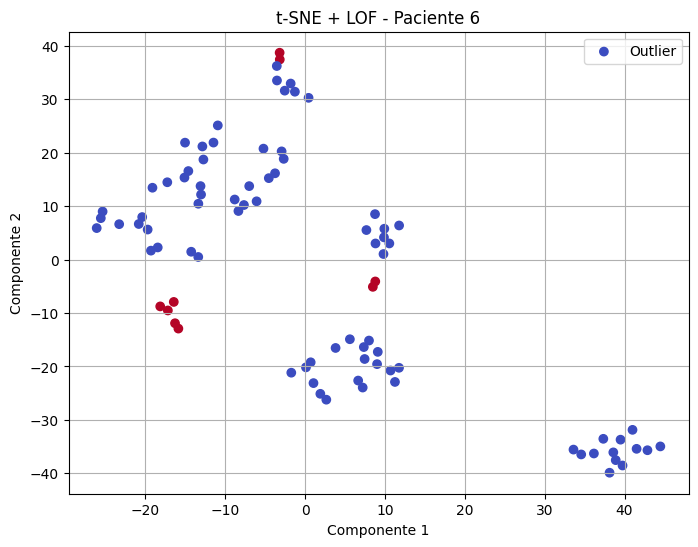

In [10]:
df_paciente = df_signos_filled[df_signos_filled['SUBJECT_ID'] == 6].copy()

# Eliminar columnas no numéricas y preparar datos
X = df_paciente.drop(columns=['SUBJECT_ID', 'HADM_ID', 'CHARTTIME'])
X = X.dropna(how='all')  # eliminar filas completamente vacías
X_filled = X.fillna(method='ffill').fillna(method='bfill')  # completar internamente
X_scaled = StandardScaler().fit_transform(X_filled)


# Aplicar t-SNE

tsne = TSNE(n_components=2, random_state=42, perplexity=5)
X_tsne = tsne.fit_transform(X_scaled)


#  LOF
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.1)
outlier_labels = lof.fit_predict(X_tsne)  # -1 outlier, 1 inlier


# (Opcional) Etiquetas reales (si las tienes), para ejemplo usamos aleatorias
# --------------------------
# Aquí asumimos que se tienen etiquetas reales (1=normal, -1=outlier)
# Si no las tienes, puedes generar un dummy artificial (sólo para visualizar cómo se vería)
# etiquetas_reales = np.random.choice([1, -1], size=len(outlier_labels), p=[0.9, 0.1])

# Para ejemplo, asumimos todos son normales excepto los que LOF detecta como outliers
etiquetas_reales = np.ones_like(outlier_labels)
etiquetas_reales[outlier_labels == -1] = -1  # asumir estos como verdaderos outliers para probar matriz


# Matriz de confusión

cm = confusion_matrix(etiquetas_reales, outlier_labels, labels=[1, -1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Outlier"])
disp.plot(cmap='Purples')
plt.title("Matriz de Confusión - Detección de Outliers (Paciente 6)")
plt.show()

# Visualización t-SNE con outliers marcados

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=(outlier_labels == -1), cmap='coolwarm', label='Outlier')
plt.title('t-SNE + LOF - Paciente 6')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
df_paciente

SIGNO,SUBJECT_ID,HADM_ID,CHARTTIME,DIASTOLIC_BP,GLUCOSE,HEART_RATE,MEAN_BP,OXYGEN_SAT,RESP_RATE,SYSTOLIC_BP,TEMP
143,6,107064,2175-05-30 20:00:00,56.0,254.0,87.0,77.000000,99.0,13.0,134.0,96.800003
144,6,107064,2175-05-30 21:00:00,56.0,254.0,84.0,76.000000,99.0,14.0,125.0,96.800003
145,6,107064,2175-05-30 22:00:00,56.0,254.0,83.0,77.000000,100.0,13.0,141.0,96.800003
146,6,107064,2175-05-30 23:00:00,62.0,254.0,84.0,85.000000,100.0,14.0,141.0,97.800003
147,6,107064,2175-05-31 00:00:00,62.0,254.0,81.0,85.000000,100.0,12.0,161.0,97.800003
...,...,...,...,...,...,...,...,...,...,...,...
225,6,107064,2175-06-03 08:00:00,69.0,124.0,91.0,100.333000,99.0,18.0,163.0,97.300003
226,6,107064,2175-06-03 09:00:00,69.0,124.0,72.0,76.333298,99.0,10.0,133.0,97.300003
227,6,107064,2175-06-03 10:00:00,69.0,124.0,75.0,82.666702,100.0,13.0,134.0,97.300003
228,6,107064,2175-06-03 11:00:00,69.0,124.0,77.0,82.666702,99.0,15.0,134.0,96.500000


In [12]:
df_paciente['IsOutlier'] =  outlier_labels

In [13]:
df_paciente.groupby('IsOutlier')['HEART_RATE'].describe()

,count,mean,std,min,25%,50%,75%,max
IsOutlier,,,,,,,,
-1,9.0,78.666667,3.674235,72.0,76.0,80.0,81.0,83.0
1,78.0,87.410256,6.628228,71.0,84.0,86.0,92.0,104.0


In [15]:
# Guarda el DataFrame con el paciente seleccionado
df_paciente.to_csv('/content/df_paciente6.csv', index=False)